In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Final_Assesment
!ls

/content/drive/MyDrive/Final_Assesment
 ClassificationTask.ipynb  'Mobile Price Prediction Datatset.csv'   RegressionTask.ipynb
 heart.csv		    RegressionTask1.ipynb


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Mobile Price Prediction Datatset.csv')

In [7]:
df.head(10)

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999
5,5,"Apple iPhone 11 Pro (Space Grey, 512 )",4.7,8.0,128.0,5.80,35,12.0,5000,140300
6,6,"Samsung Galaxy A70s (Prism Crush Red, 128 )",4.4,8.0,128.0,6.70,64,5.0,4700,29999
7,7,"Samsung Galaxy S10 Lite (Prism Blue, 512 )",4.5,8.0,128.0,6.70,48,12.0,4700,47999
8,8,"OPPO A9 (Marble Green, 128 )",4.4,4.0,128.0,6.53,48,2.0,4020,16490
9,9,"POCO F1 (Graphite Black, 256 )",4.5,8.0,256.0,6.18,35,5.0,3800,22999


Number of columns in dataset and correspondin entries in them.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand me       836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


In [9]:
df.shape

(836, 10)

In [10]:
df.describe()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,417.500000,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,241.476707,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,0.000000,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,208.750000,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,417.500000,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,626.250000,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,835.000000,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [11]:
df.isna().sum()

,0
Unnamed: 0,0
Brand me,0
Ratings,31
RAM,7
ROM,4
Mobile_Size,2
Primary_Cam,0
Selfi_Cam,269
Battery_Power,0
Price,0


Dropping unnecessary columns

In [12]:
# df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand me       836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


Changing name of columns for more clarity.

In [13]:
df.rename(columns={'Brand me': 'Brand'}, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand          836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

,0
Unnamed: 0,0
Brand,0
Ratings,0
RAM,0
ROM,0
Mobile_Size,0
Primary_Cam,0
Selfi_Cam,0
Battery_Power,0
Price,0


In [17]:
df.describe()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,417.460980,4.209256,6.001815,77.666062,5.933630,46.491833,9.607985,3513.756806,26833.330309
std,239.279657,0.344628,2.463921,60.023034,3.762635,10.091014,6.330780,884.794042,63345.967140
min,0.000000,3.000000,1.000000,3.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,220.000000,4.000000,4.000000,32.000000,4.540000,38.000000,5.000000,3000.000000,1299.000000
50%,414.000000,4.300000,6.000000,64.000000,5.990000,48.000000,8.000000,3500.000000,14995.000000
75%,618.000000,4.500000,8.000000,128.000000,6.400000,48.000000,13.000000,4015.000000,29999.000000
max,835.000000,4.700000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.000000


In [18]:
# Correlation matrix
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm")
# plt.title("Feature Correlation Heatmap")
# plt.show()

In [19]:
cols=df._get_numeric_data().columns.values.tolist()
cols

['Unnamed: 0',
 'Ratings',
 'RAM',
 'ROM',
 'Mobile_Size',
 'Primary_Cam',
 'Selfi_Cam',
 'Battery_Power',
 'Price']

Detection of outlies using boxplot.

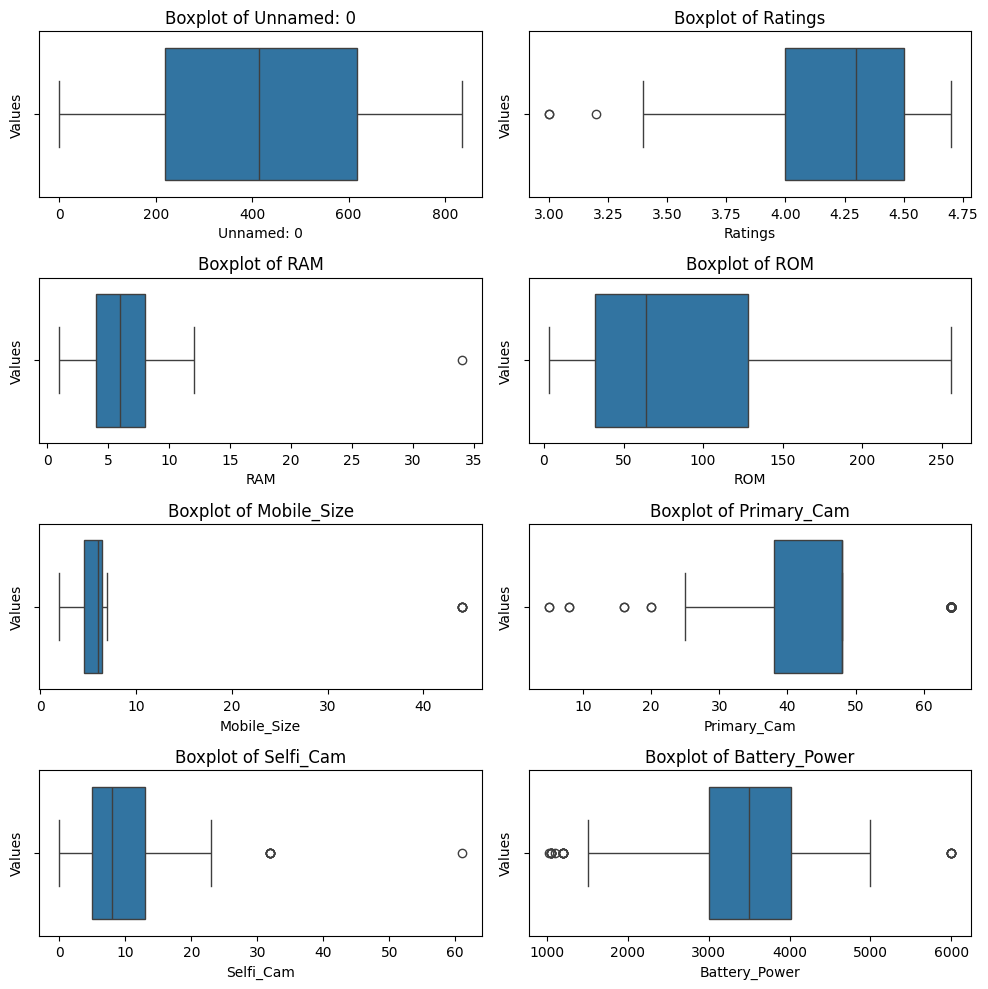

In [20]:
fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
idx=0
for i in range(0,4):
  for j in range(0,2):
    sns.boxplot(x=df[cols[idx]],ax=axes[i][j])
    axes[i][j].set_title(f"Boxplot of {cols[idx]}")
    axes[i][j].set_ylabel('Values')
    idx+=1
plt.tight_layout()
plt.show()

In [21]:
def remove_outlier(df,column):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  return df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

#Apply outlier removal to relevant columns
for col in cols:
  df=remove_outlier(df,col)
df

,Unnamed: 0,Brand,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999
7,7,"Samsung Galaxy S10 Lite (Prism Blue, 512 )",4.5,8.0,128.0,6.70,48,12.0,4700,47999
...,...,...,...,...,...,...,...,...,...,...
825,825,Micax X1i-Pop,4.1,4.0,40.0,4.77,48,15.0,3000,1080
828,828,"Samsung Galaxy S8 Plus (Midnight Black, 64 )",4.6,4.0,64.0,6.20,35,8.0,3500,53990
829,829,"Black Shark 2 (Shadow Black, 128 )",4.4,6.0,128.0,6.39,48,12.0,3800,31999
831,831,Karbonn K24 Plus Pro,3.8,6.0,32.0,4.54,48,12.0,2800,1299


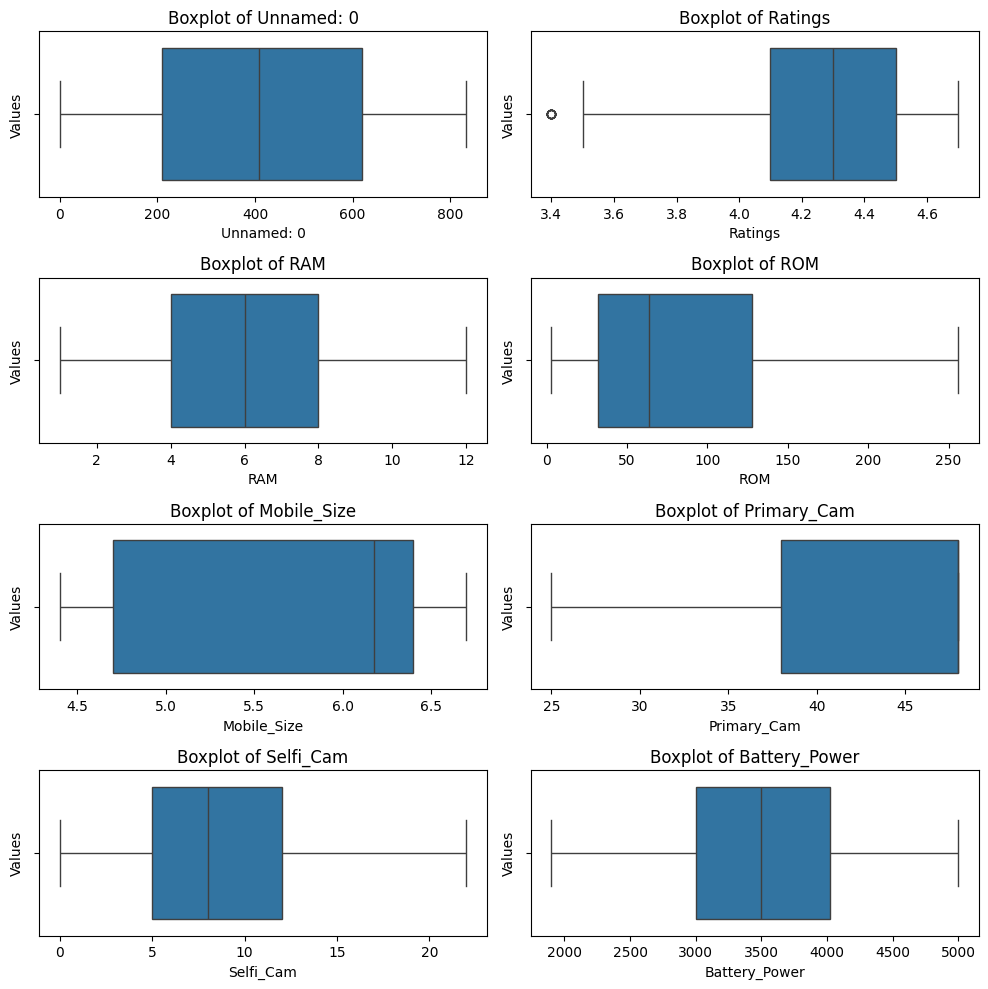

In [22]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(10,10))
idx=0
for i in range(0,4):
  for j in range(0,2):
    sns.boxplot(x=df[cols[idx]],ax=axes[i][j])
    axes[i][j].set_title(f"Boxplot of {cols[idx]}")
    axes[i][j].set_ylabel('Values')
    idx+=1
plt.tight_layout()
plt.show()

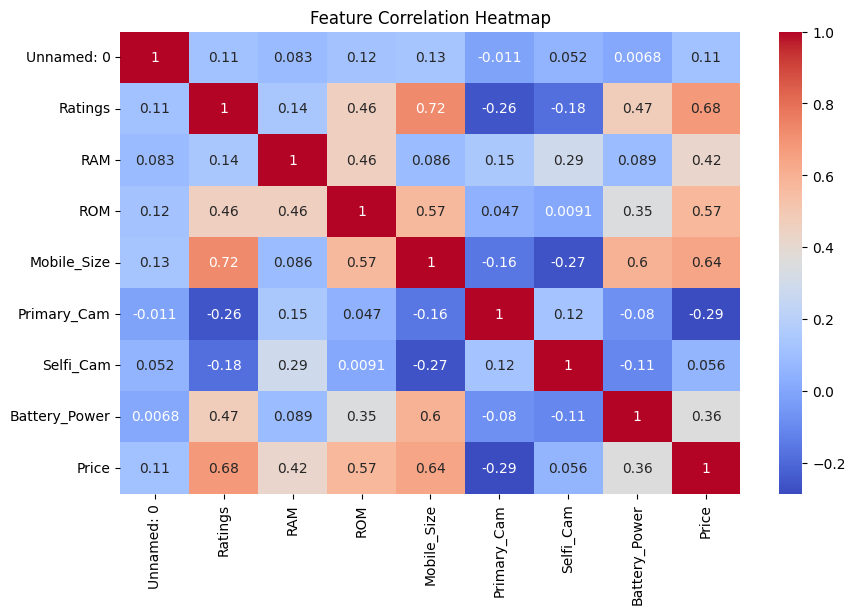

In [23]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

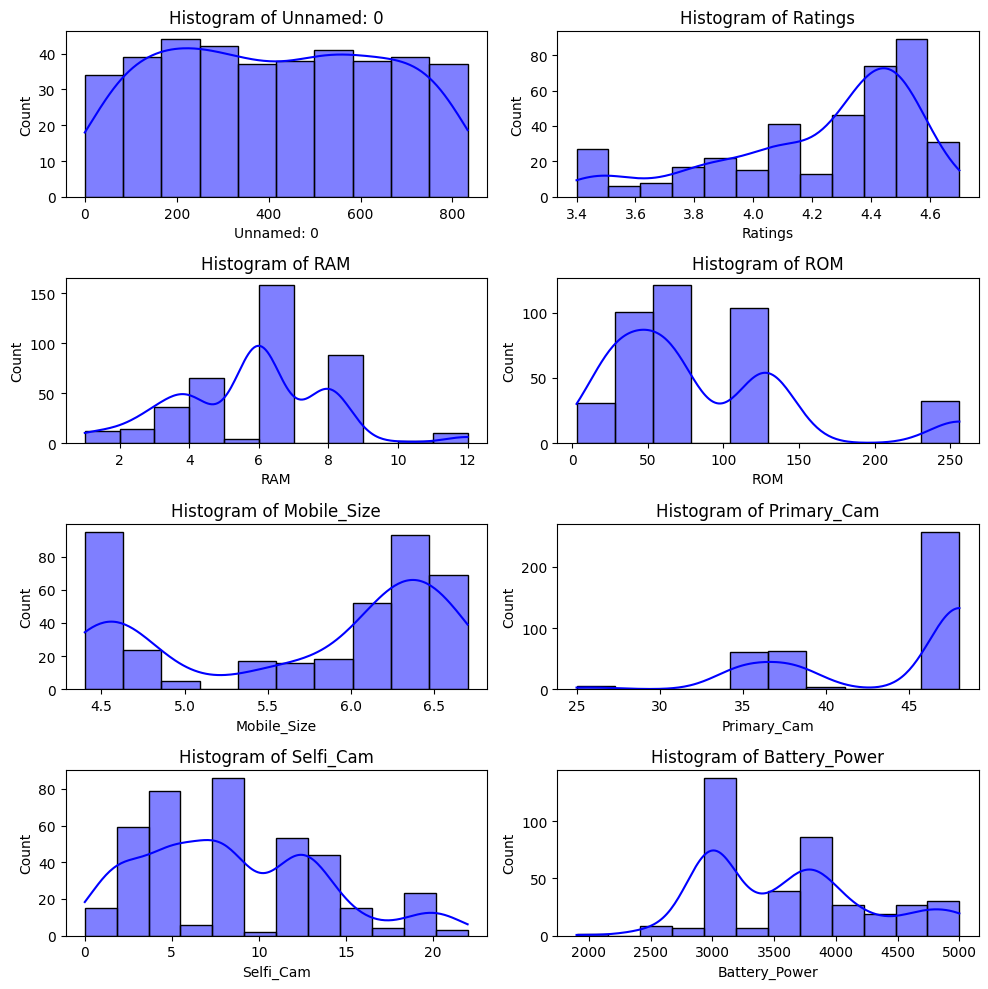

In [24]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(10,10))
idx=0
for i in range(0,4):
  for j in range(0,2):
    sns.histplot(x=df[cols[idx]],ax=axes[i][j],kde=True, color='blue')
    axes[i][j].set_title(f"Histogram of {cols[idx]}")

    idx+=1
plt.tight_layout()
plt.show()

In [25]:
#Define features and target variable
X=df.drop({'Price', 'Brand'},axis=1) #features
y=df['Price'] #target variable

Linear Regression from Scratch

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights to zeros
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))  # Gradient of weights
            db = (1 / n_samples) * np.sum(y_pred - y)  # Gradient of bias

            self.weights -= self.learning_rate * dw  # Update weights
            self.bias -= self.learning_rate * db  # Update bias

    def predict(self, X):
        X = np.array(X, dtype=float)
        return np.dot(X, self.weights) + self.bias


# Preparing data
X = np.array(df.drop(columns=["Price", "Brand"]), dtype=float)
y = np.array(df["Price"], dtype=float)

# Standardize features to prevent numerical instability
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate
model_scratch = LinearRegressionScratch(learning_rate=0.001)  # Lower learning rate for stability
model_scratch.fit(X_train, y_train)
y_pred_scratch = model_scratch.predict(X_test)

# Calculate performance
print("MSE (Linear Regression from Scratch):", mean_squared_error(y_test, y_pred_scratch))
print("r-squared (Linear Regression from Scratch):",r2_score(y_test,y_pred_scratch))


MSE (Linear Regression from Scratch): 144632267.0285653
r-squared (Linear Regression from Scratch): 0.5029248375464835


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [28]:
#split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model "Linear Regression"

In [29]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
# Make predictions
y_pred=model.predict(X_test)

In [31]:
#evaluate the model
mse_lr=mean_squared_error(y_test,y_pred)
r2_lr=r2_score(y_test,y_pred)
print(f'Mean Squared Error:{mse_lr}')
print(f'R-Squared: {r2_lr}')
print(f'training score:{model.score(X_train,y_train)}')
print(f'testing score:{model.score(X_test,y_test)}')

Mean Squared Error:89613298.03919128
R-Squared: 0.6920151664909691
training score:0.6793929913047455
testing score:0.6920151664909691


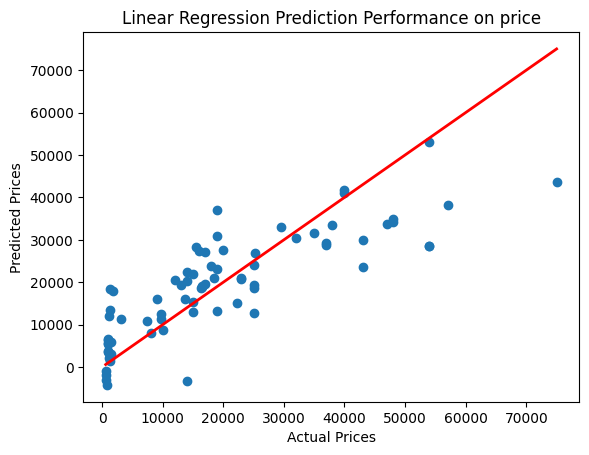

In [32]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression Prediction Performance on price')
plt.show()

Train the model "Random forest Regressor"

In [33]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

model2.score(X_train, y_train)

0.988396157636187

In [34]:
# predicting the price on the testing set
y2_pred = model2.predict(X_test)

In [35]:
#evaluate the model
mse_rf = mean_squared_error(y_test, y2_pred)
r2_rf = r2_score(y_test, y2_pred)
print(f'Mean Squared Error: {mse_rf}')
print(f'R-Squared: {r2_rf}')
print("training score", model2.score(X_train, y_train))
print("testing score", model2.score(X_test, y_test))


Mean Squared Error: 40939389.014073074
R-Squared: 0.8592986623040424
training score 0.988396157636187
testing score 0.8592986623040424


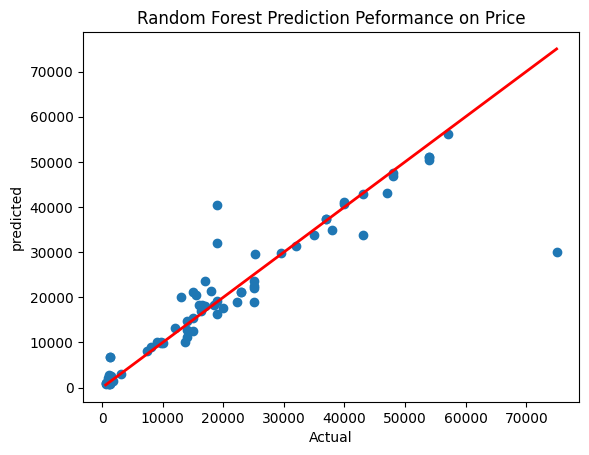

In [36]:
plt.scatter(y_test, y2_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("Random Forest Prediction Peformance on Price")
plt.show()

#determine the best model

In [37]:
if mse_lr < mse_rf and r2_lr > r2_rf:
    print("Linear Regression performs better.")
elif mse_rf < mse_lr and r2_rf > r2_lr:
    print("Random Forest performs better.")

Random Forest performs better.


Hyperparamater tuning for model 1

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid1 = {"fit_intercept": [True, False]}
grid1 = GridSearchCV(LinearRegression(), param_grid1, cv=5, scoring='neg_mean_squared_error')
grid1.fit(X_train, y_train)

print("Best parameters for Model 1:", grid1.best_params_)
print("Best MSE for Model 1:", -grid1.best_score_)

Best parameters for Model 1: {'fit_intercept': True}
Best MSE for Model 1: 95330453.26509117


Hyperparameter Tuning for Model 2 (Random Forest)

In [39]:
param_grid2 = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
grid2 = GridSearchCV(RandomForestRegressor(), param_grid2, cv=5, scoring='neg_mean_squared_error')
grid2.fit(X_train, y_train)

print("Best parameters for Model 2:", grid2.best_params_)
print("Best MSE for Model 2:", -grid2.best_score_)

Best parameters for Model 2: {'max_depth': None, 'n_estimators': 100}
Best MSE for Model 2: 24241657.148645632


Feature Selection using Recursive Feature Elimination (RFE)

In [40]:
from sklearn.feature_selection import RFE

#feature selection for model1
rfe1 = RFE(model, n_features_to_select=5)
rfe1.fit(X_train, y_train)

selected_features1 = df.drop(columns=["Price","Brand"]).columns[rfe1.support_]
print("Best Features for Model 1:", selected_features1)


Best Features for Model 1: Index(['Ratings', 'RAM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam'], dtype='object')


In [41]:
#feature selection for model2
rfe2 = RFE(model2, n_features_to_select=5)
rfe2.fit(X_train, y_train)

selected_features2 = df.drop(columns=["Price","Brand"]).columns[rfe2.support_]
print("Best Features for Model 2:", selected_features2)

Best Features for Model 2: Index(['Ratings', 'RAM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam'], dtype='object')


Final Model

In [42]:
# Re-train the best model using best parameters and selected features
best_model = RandomForestRegressor(n_estimators=grid2.best_params_["n_estimators"],
                                   max_depth=grid2.best_params_["max_depth"],
                                   random_state=42)

X_train_selected = X_train[:, rfe2.support_]
X_test_selected = X_test[:, rfe2.support_]

best_model.fit(X_train_selected, y_train)
final_predictions = best_model.predict(X_test_selected)

# Evaluate final model
final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)
print("Final Model MSE:", final_mse)
print("Final Model R-squared:", final_r2)
print("Final Model Training Score:", best_model.score(X_train_selected, y_train))
print("Final Model Testing Score:", best_model.score(X_test_selected, y_test))


Final Model MSE: 39994013.07488042
Final Model R-squared: 0.8625477498569674
Final Model Training Score: 0.9863400448340524
Final Model Testing Score: 0.8625477498569674


In [43]:
print(f"Initial MSE and r2 (Model 1): {mse_lr}, {r2_lr}")
print(f"Initial MSE and r2 (Model 2): {mse_rf}, {r2_rf}")
print(f"Final Model MSE and r2: {final_mse}, {final_r2}")

if final_mse < min(mse_lr, mse_rf) and final_r2 > max(r2_lr, r2_rf):
    print("Model performance improved after tuning and feature selection.")
else:
    print("No significant improvement in model performance.")


Initial MSE and r2 (Model 1): 89613298.03919128, 0.6920151664909691
Initial MSE and r2 (Model 2): 40939389.014073074, 0.8592986623040424
Final Model MSE and r2: 39994013.07488042, 0.8625477498569674
Model performance improved after tuning and feature selection.
